In [ ]:
# Regression with tensorflow

##Dataset Description

Concrete dataset:

In [40]:
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.utils import plot_model,to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split


In [41]:
concrete_data= pd.read_csv('/content/drive/MyDrive/Deep learning Mtech Residency rev+LI/DL Materials Sagarika/Class problems/Session 2/ANN + CNN/concrete.csv')
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [42]:

min_d = concrete_data.min()
max_d = concrete_data.max()
normalized_df=(concrete_data - min_d)/(max_d - min_d)
normalized_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,0.089726,0.589872,0.000000,0.652556,0.000000,0.496512,0.387607,0.074176,0.343341
1,0.152740,0.117418,0.621189,0.291534,0.335404,0.813372,0.507275,0.035714,0.263859
2,0.337900,0.000000,0.478261,0.523962,0.170807,0.453198,0.670346,0.074176,0.334994
3,0.374429,0.317195,0.000000,0.848243,0.000000,0.380814,0.190667,0.074176,0.542170
4,0.120548,0.510295,0.000000,0.571086,0.282609,0.716279,0.257652,0.074176,0.198829


In [43]:

desnormalized_df = normalized_df * (max_d - min_d) + min_d
desnormalized_df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29


<Axes: >

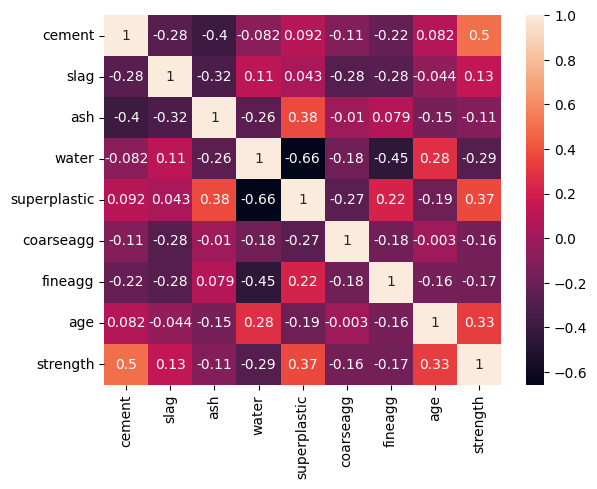

In [44]:
sns.heatmap(concrete_data.corr(), annot=True)

In [45]:
normal_train = normalized_df.iloc[:,:8]
normal_label = normalized_df.iloc[:,-1:]

In [46]:
xtrain, xtest, ytrain, ytest = train_test_split(normal_train, normal_label, test_size = 0.15, random_state = 1)

print(xtrain.shape)
print(ytrain.shape)


print(xtest.shape)
print(ytest.shape)


(875, 8)
(875, 1)
(155, 8)
(155, 1)


In [83]:

model = Sequential()
model.add(Dense(30, activation='relu', input_shape=[len(xtrain.keys())]))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))



model.compile(loss='mean_squared_error',
                optimizer='sgd',
                metrics=['mean_squared_error'])


In [84]:
model.output

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_31')>

In [85]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 30)                270       
                                                                 
 dense_29 (Dense)            (None, 20)                620       
                                                                 
 dense_30 (Dense)            (None, 20)                420       
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [86]:
EPOCHS = 100

history = model.fit(
  xtrain, ytrain,
  epochs=EPOCHS,verbose='auto',validation_split = 0.2,validation_data=(xtest,ytest))

Epoch 1/100
28/28 [==============================] - 1s 10ms/step - loss: 0.1366 - mean_squared_error: 0.1366 - val_loss: 0.0670 - val_mean_squared_error: 0.0670
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0552 - mean_squared_error: 0.0552 - val_loss: 0.0488 - val_mean_squared_error: 0.0488
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.0462 - mean_squared_error: 0.0462 - val_loss: 0.0471 - val_mean_squared_error: 0.0471
Epoch 4/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0448 - mean_squared_error: 0.0448 - val_loss: 0.0467 - val_mean_squared_error: 0.0467
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0463 - val_mean_squared_error: 0.0463
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.0439 - mean_squared_error: 0.0439 - val_loss: 0.0460 - val_mean_squared_error: 0.0460
Epoch 7/100
28/28 [==============

In [87]:

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()


,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
0,0.136611,0.136611,0.067035,0.067035,0
1,0.055187,0.055187,0.048800,0.048800,1
2,0.046159,0.046159,0.047069,0.047069,2
3,0.044795,0.044795,0.046721,0.046721,3
4,0.044302,0.044302,0.046343,0.046343,4


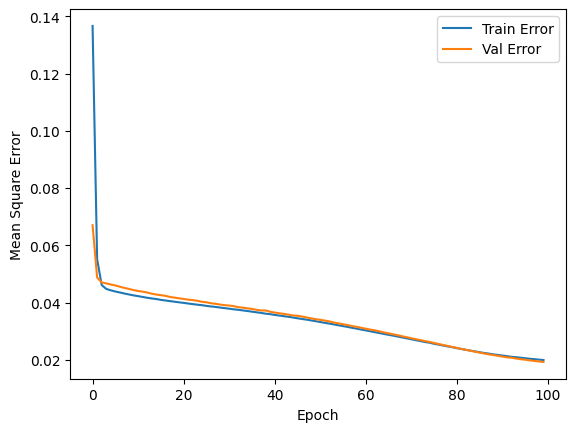

In [88]:

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch


  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mean_squared_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_squared_error'],
           label = 'Val Error')
  plt.legend()
  plt.show()


plot_history(history)


5/5 [==============================] - 0s 3ms/step


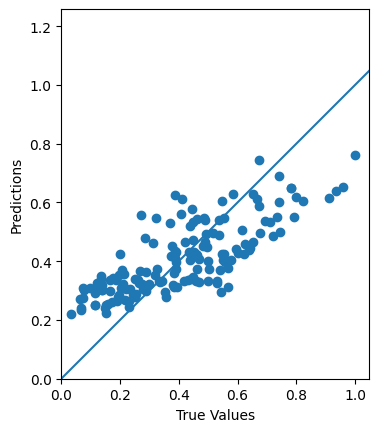

In [89]:
test_predictions = model.predict(xtest).flatten()

plt.scatter(ytest, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


In [90]:
from sklearn.metrics import r2_score
r2_score(ytest,test_predictions)

0.5694221746938113

In [91]:
model.weights

[<tf.Variable 'dense_28/kernel:0' shape=(8, 30) dtype=float32, numpy=
 array([[-0.08668893, -0.33962712,  0.26700845,  0.03292461, -0.31807604,
         -0.08250631,  0.28700662, -0.14813733,  0.40931576, -0.08002517,
          0.23793124, -0.3866077 ,  0.31323415, -0.2957768 , -0.363121  ,
         -0.00633446,  0.050946  , -0.06374048,  0.11602073,  0.3284357 ,
         -0.33802143, -0.19076002, -0.14006937,  0.4729557 ,  0.27003664,
         -0.11292651, -0.32132596, -0.10127819,  0.05608949,  0.41427708],
        [ 0.16620484, -0.24207456,  0.2084127 , -0.24034102,  0.12828659,
          0.1647919 ,  0.20090196,  0.14905006,  0.17002876,  0.0021832 ,
         -0.19862586, -0.22364695,  0.12861508,  0.13170162,  0.15981299,
         -0.23188305, -0.30693504, -0.07972758, -0.30366942, -0.12977648,
          0.23208132,  0.34477255, -0.38984376,  0.30678695,  0.30227166,
          0.13930176,  0.1547567 , -0.1989498 ,  0.2809136 , -0.08878361],
        [ 0.31415886,  0.33506283,  0.14